In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for i in range(4):
    globals()[tech_list[i]] = yf.download(tech_list[i], start, end).assign(Company=company_name[i])

company_list = [AAPL, GOOG, MSFT, AMZN]

print(company_list)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[Price            Close        High         Low        Open    Volume Company
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL        
Date                                                                        
2024-03-05  169.320480  171.231455  168.822830  169.957472  95132400   APPLE
2024-03-06  168.325180  170.435227  167.887245  170.256065  68587700   APPLE
2024-03-07  168.205750  169.927615  167.698152  168.355038  71765100   APPLE
2024-03-08  169.927628  172.883671  168.146047  168.205762  76114600   APPLE
2024-03-11  171.938126  173.560470  171.241418  172.127235  60139500   APPLE
...                ...         ...         ...         ...       ...     ...
2025-02-26  240.360001  244.979996  239.130005  244.330002  44433600   APPLE
2025-02-27  237.300003  242.460007  237.059998  239.410004  41153600   APPLE
2025-02-28  241.839996  242.089996  230.199997  236.949997  56833400   APPLE
2025-03-03  238.029999  244.029999  236.110001  241.789993  47088200   APPL

In [2]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,215.173017,217.096567,212.986315,214.902660,5.612597e+07
std,25.716332,25.831437,25.285842,25.604874,3.088571e+07
min,164.224548,165.617963,163.308874,164.572928,2.323470e+07
25%,192.699852,194.419082,191.598554,192.440719,4.028265e+07
50%,223.983734,225.865877,222.163330,224.086848,4.890275e+07
75%,232.530323,233.693061,229.287856,231.700250,6.176092e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-03-05 to 2025-03-04
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
 5   (Company, )     250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


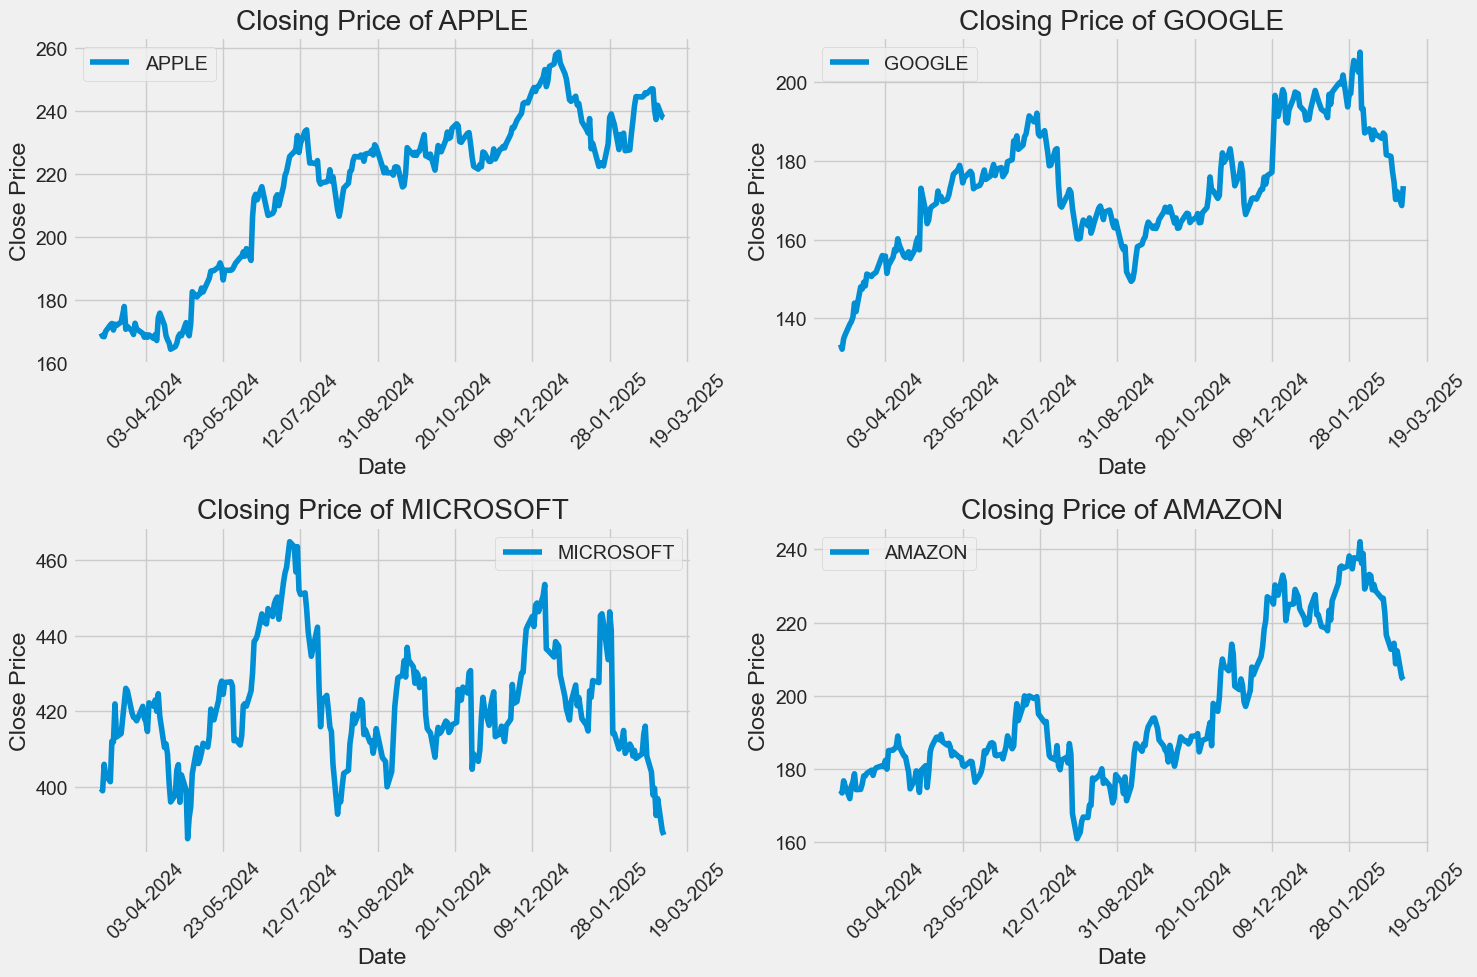

In [4]:
#Plotting an example for closing price of all the stock under observation
import matplotlib.dates as mdates
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company.index = pd.to_datetime(company.index)  
    plt.plot(company.index, company["Close"], label=company_name[i - 1])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Show every 50th day
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.ylabel("Close Price")
    plt.xlabel("Date")
    plt.title(f"Closing Price of {company_name[i - 1]}")
    plt.legend()

plt.tight_layout()
plt.show()

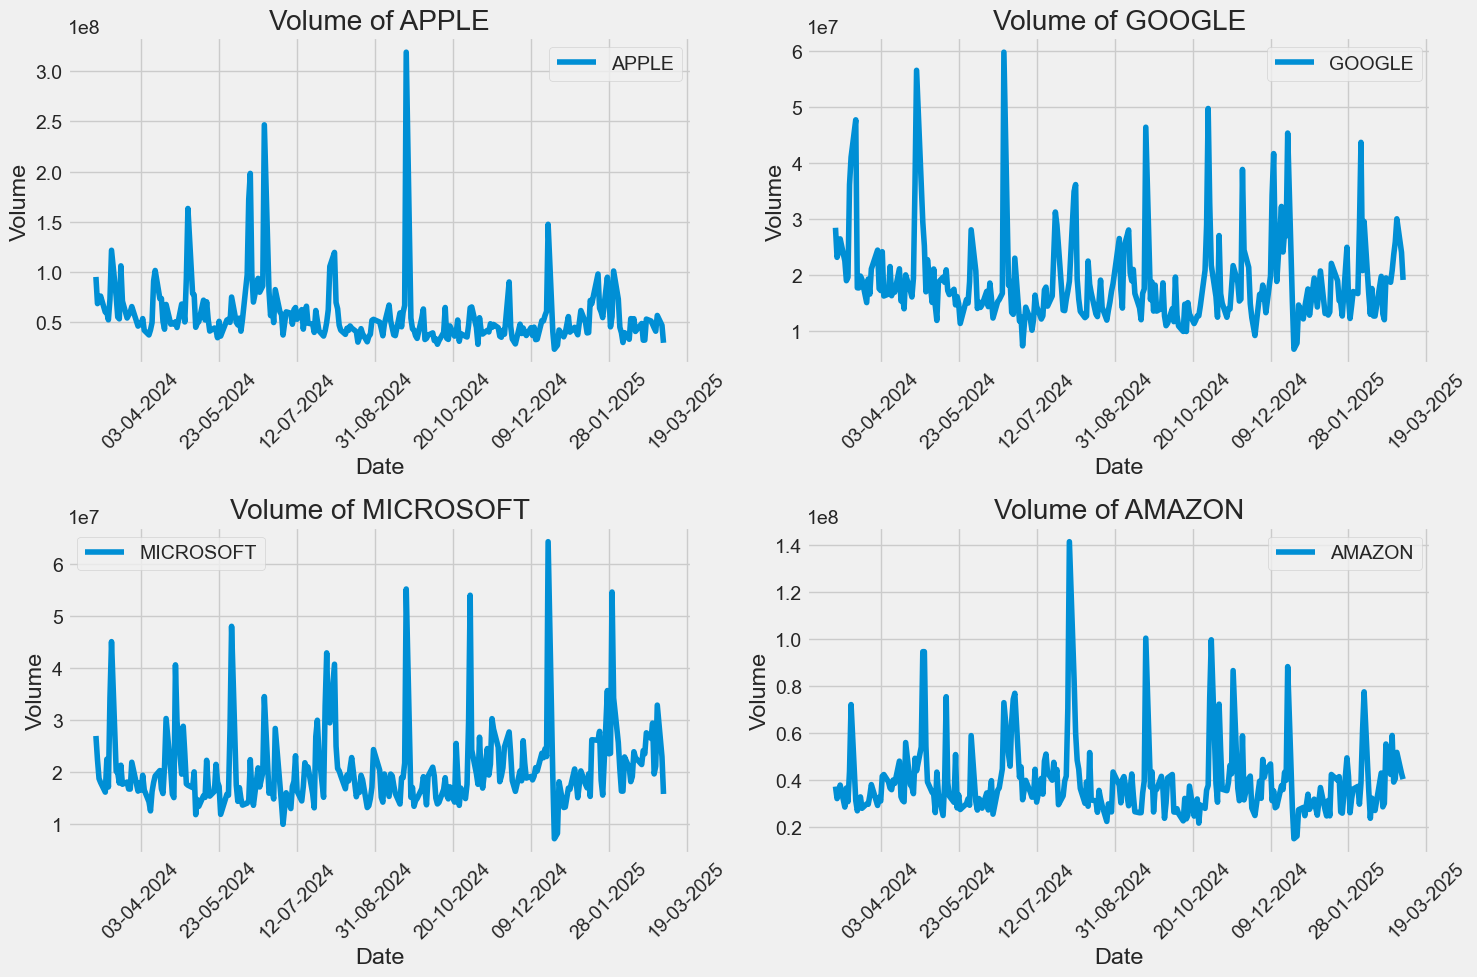

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company.index = pd.to_datetime(company.index)  
    plt.plot(company.index, company["Volume"], label=company_name[i - 1])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Show every 50th day
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.ylabel("Volume")
    plt.xlabel("Date")
    plt.title(f"Volume of {company_name[i - 1]}")
    plt.legend()

plt.tight_layout()
plt.show()

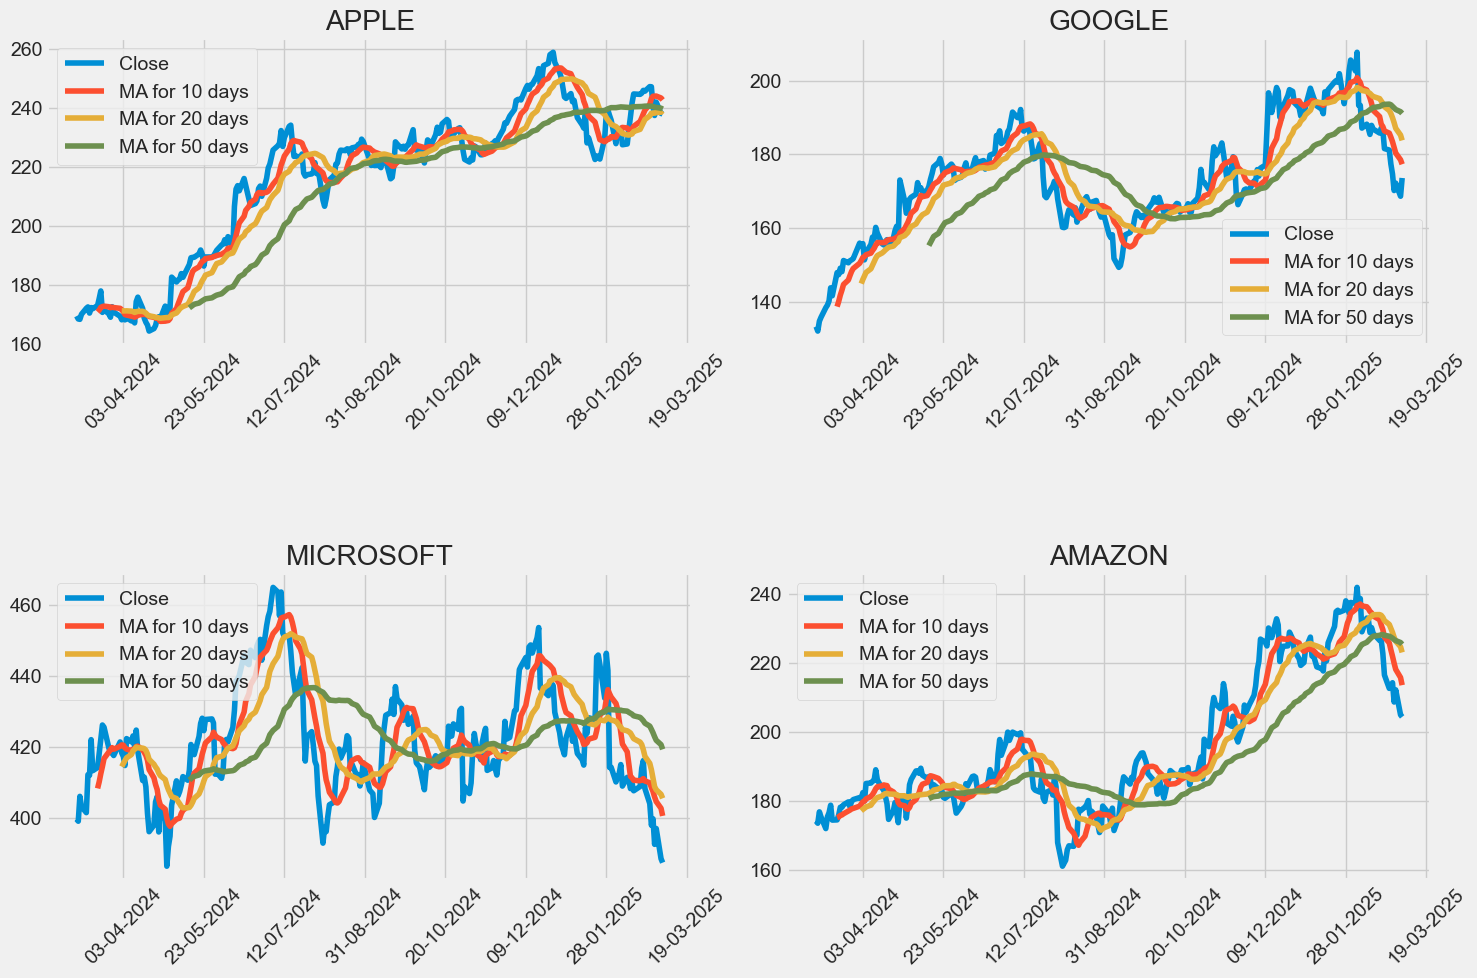

In [6]:

#Calculating moving averages over different time periods of 10,20 and 50 days
#The Moving Average is a simple technical analysis tool that smooths out price data by creating a constantly updated average price.
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()        
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company.index = pd.to_datetime(company.index)
    plt.plot(company.index,company['Close'],label='Close')
    plt.plot(company.index,company['MA for 10 days'],label='MA for 10 days')
    plt.plot(company.index,company['MA for 20 days'],label='MA for 20 days')
    plt.plot(company.index,company['MA for 50 days'],label='MA for 50 days')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Show every 50th day
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.title(company_name[i-1])
    plt.legend()
plt.tight_layout()

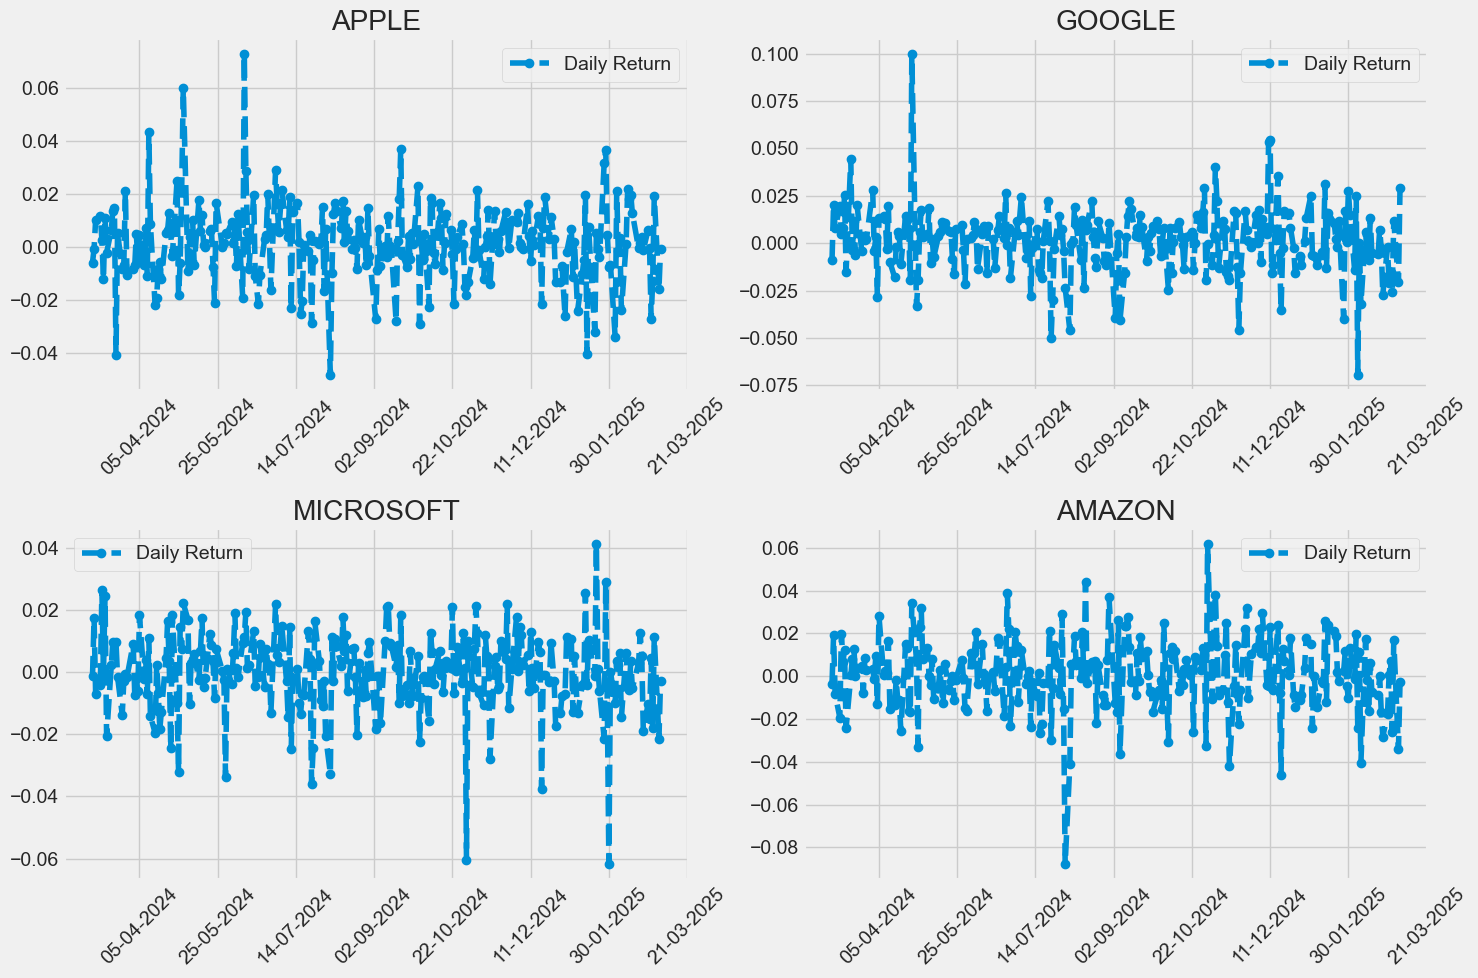

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company.index = pd.to_datetime(company.index)
    plt.plot(company.index,company['Daily Return'],label='Daily Return',linestyle='--',marker='o')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Show every 50th day
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.title(company_name[i-1])
    plt.legend()
plt.tight_layout()

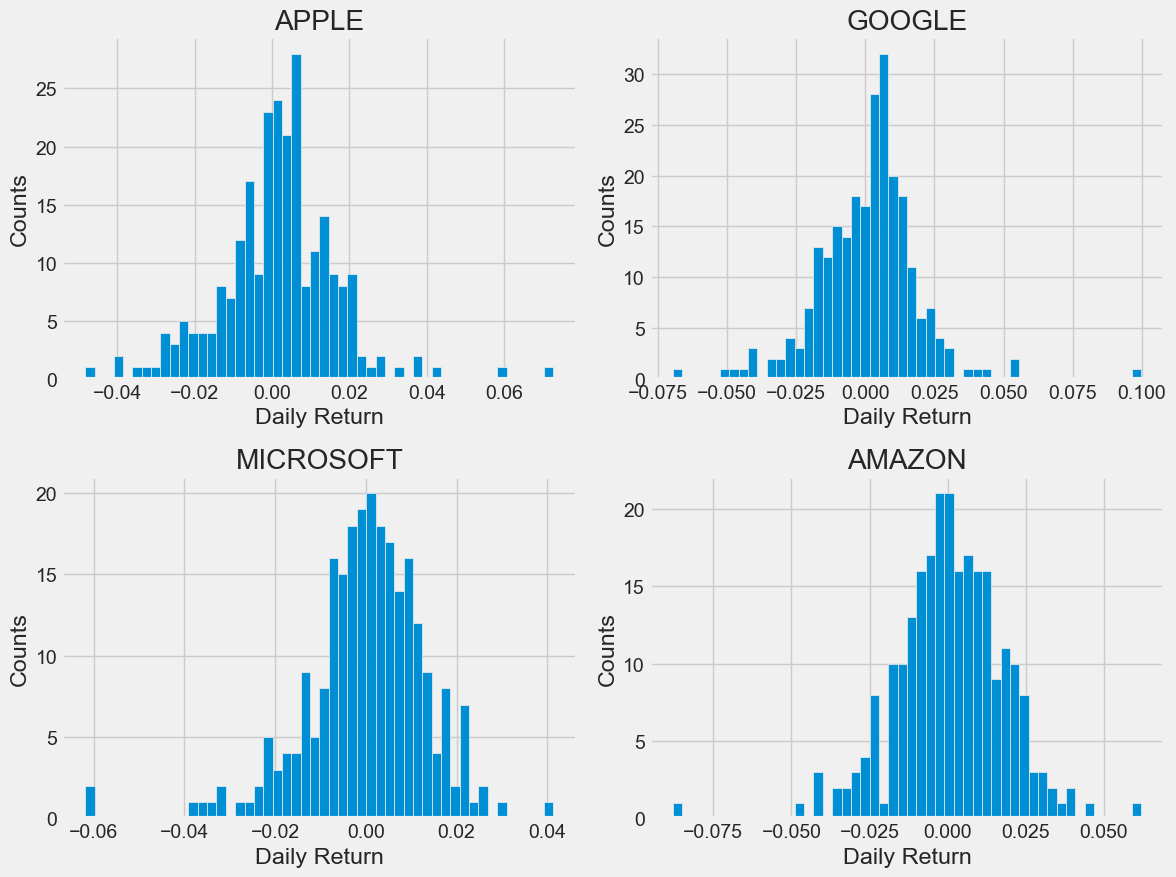

In [8]:
plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')  
plt.tight_layout()

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-03-05,NaN,NaN,NaN,NaN
2024-03-06,-0.005878,-0.003503,-0.009119,-0.001391
2024-03-07,-0.000710,0.019077,0.020217,0.017533
2024-03-08,0.010237,-0.008314,0.007764,-0.007137
2024-03-11,0.011832,-0.019333,0.019444,-0.004185


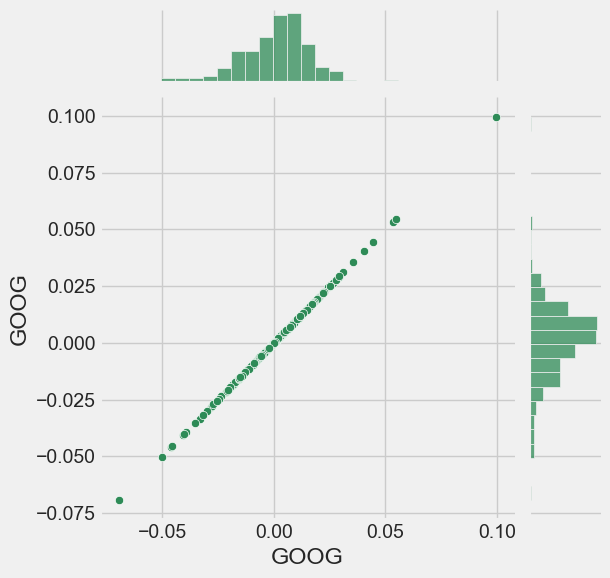

In [10]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

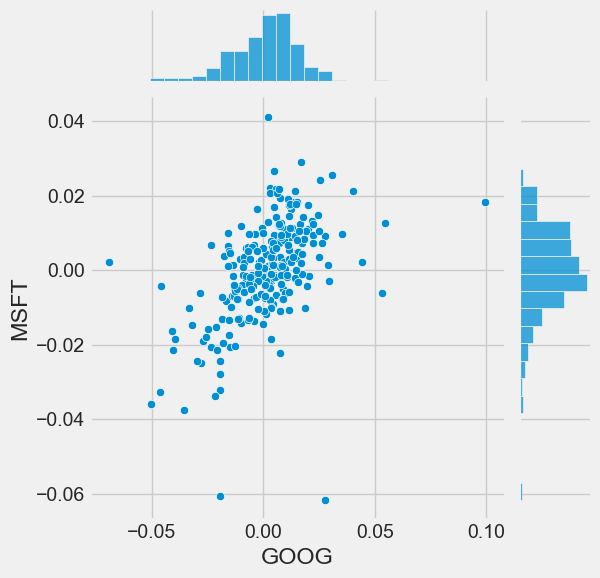

In [11]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

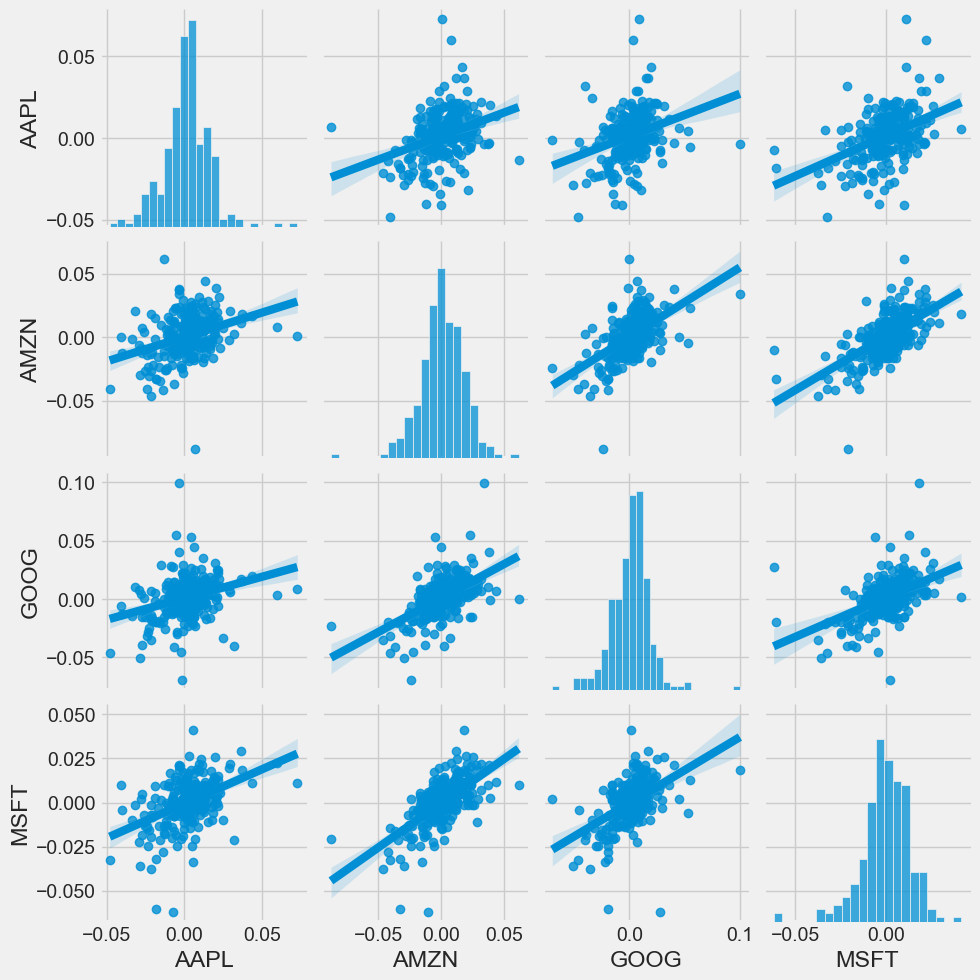

In [12]:
sns.pairplot(tech_rets, kind='reg')

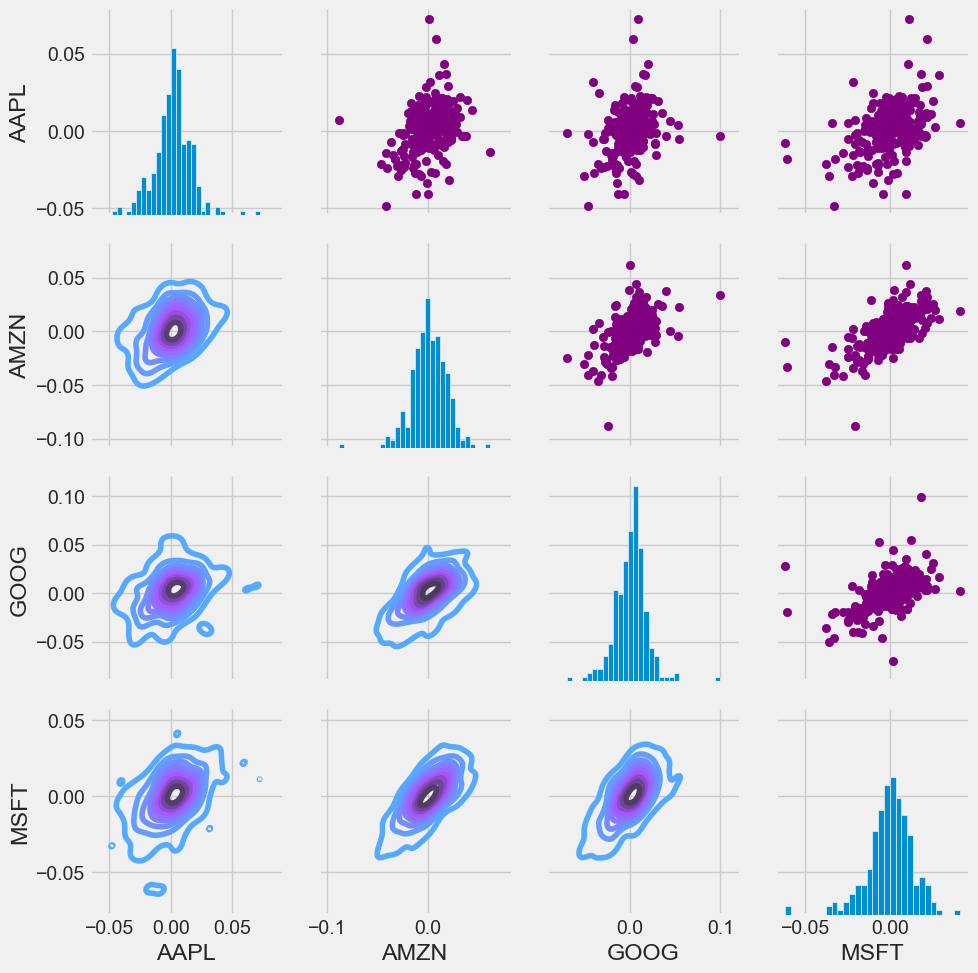

In [13]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

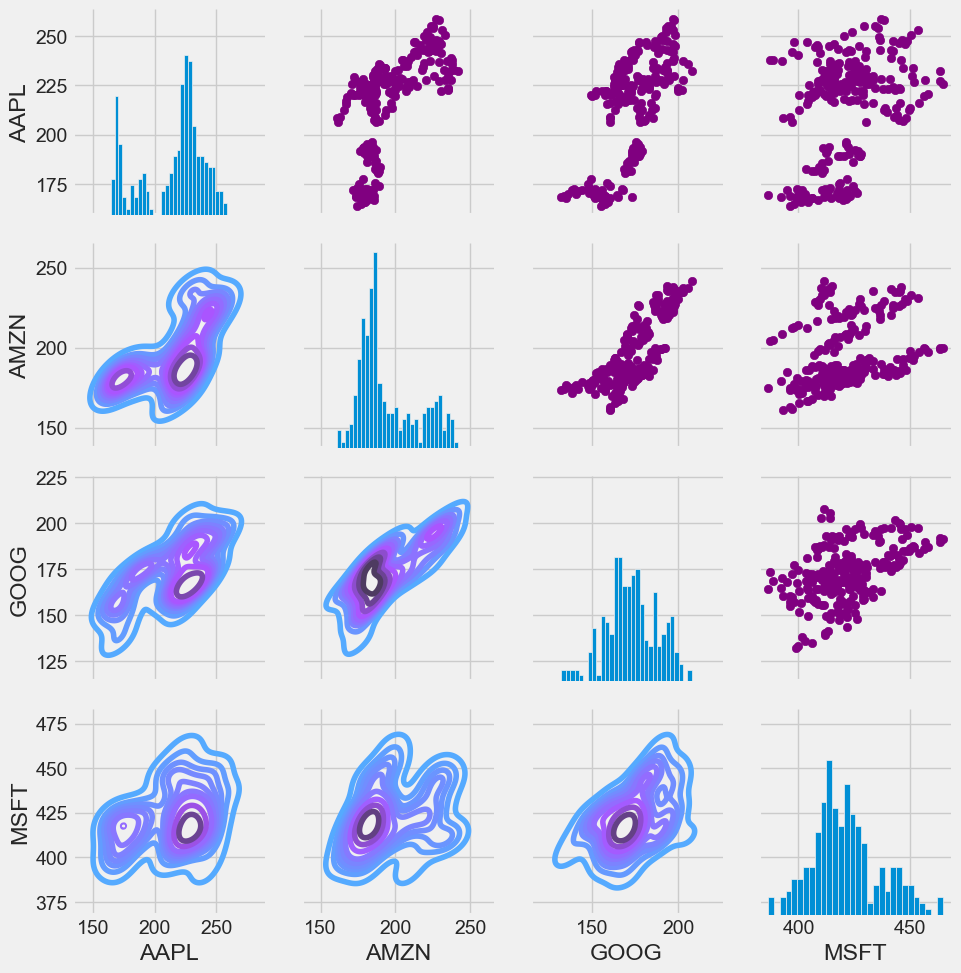

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

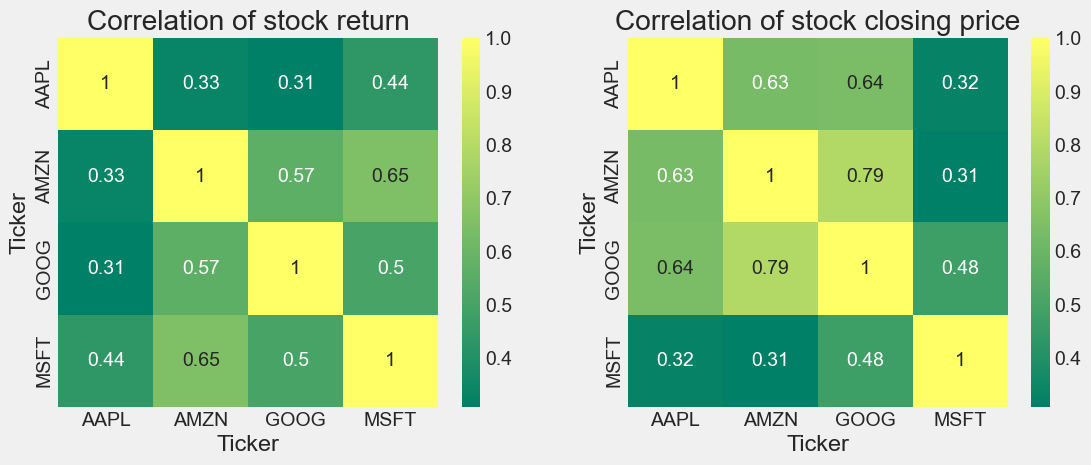

In [15]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

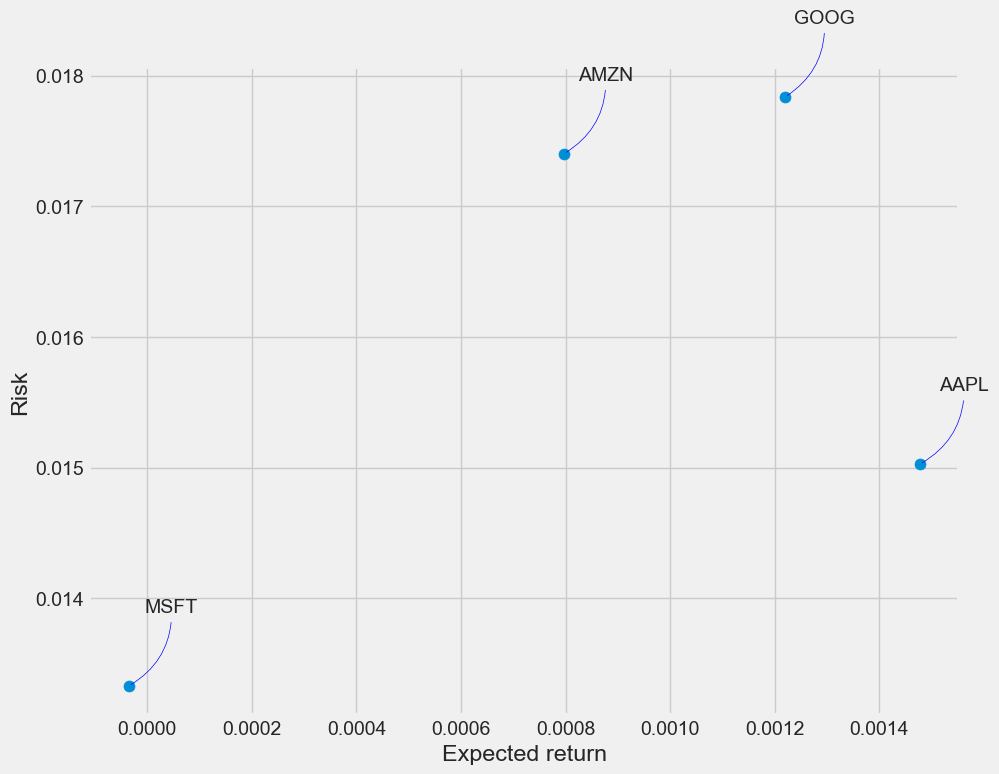

In [16]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [17]:
ticker = 'AAPL'
start_date = "2015-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")  # Convert to string format

# Fetch stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Show the first few rows
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320431  24.789800  23.879980  24.778677  212818400
2015-01-05  23.635290  24.169170  23.448433  24.089088  257142000
2015-01-06  23.637512  23.897778  23.274918  23.699798  263188400
2015-01-07  23.968966  24.069067  23.735393  23.846617  160423600
2015-01-08  24.889908  24.947745  24.180292  24.298192  237458000


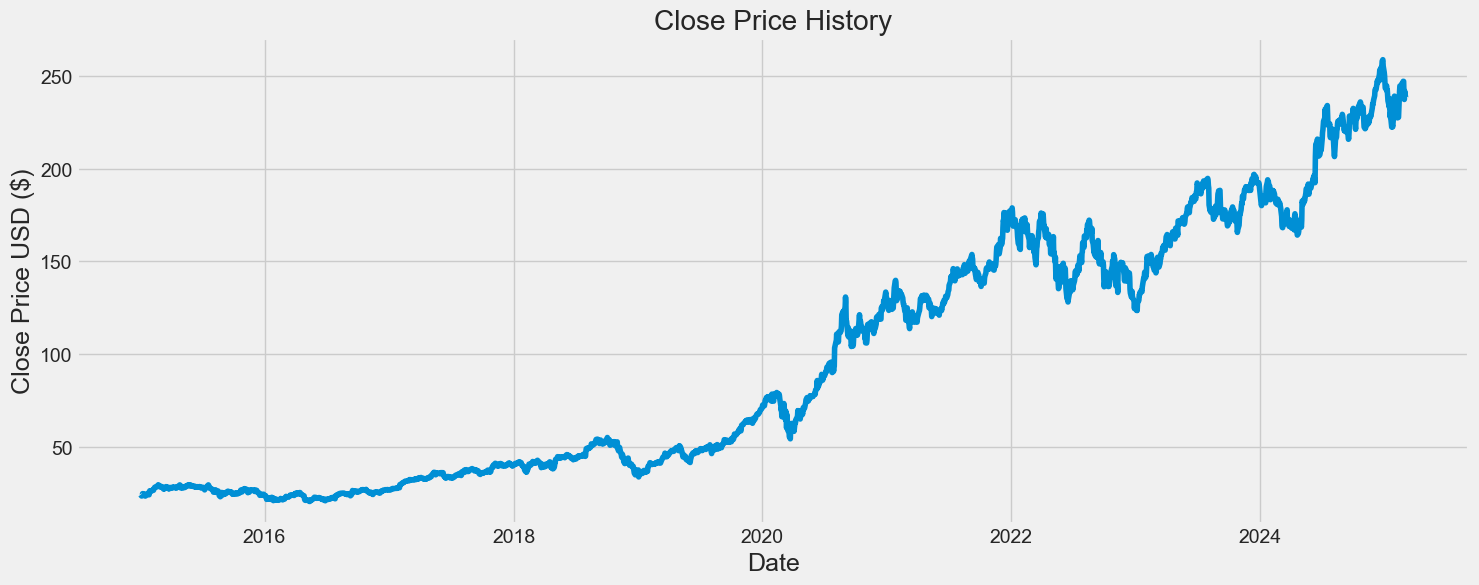

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:
# Create a new dataframe with only the 'Close column 
df.columns = df.columns.get_level_values(0)
print(df.columns)
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
print(data.columns)
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Index(['Close'], dtype='object')


2430

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler


dataset = df[["Close"]].values  # Ensure it's a 2D array

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.01531496]
 [0.01243696]
 [0.01244629]
 ...
 [0.92902865]
 [0.91302436]
 [0.91243628]]


In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01531496, 0.01243696, 0.01244629, 0.0138386 , 0.01770711,
       0.01781923, 0.01524022, 0.01614661, 0.01575416, 0.01296957,
       0.01219399, 0.01474496, 0.01552055, 0.01818364, 0.01872564,
       0.01883774, 0.0151374 , 0.02090281, 0.02425741, 0.02263151,
       0.02400512, 0.02402379, 0.02487413, 0.02567151, 0.02472403,
       0.02546512, 0.02762278, 0.03030578, 0.03178802, 0.03236963,
       0.0330732 , 0.03390812, 0.03365486, 0.03463985, 0.03792324,
       0.03714463, 0.03397378, 0.03550294, 0.03366425, 0.03425523,
       0.03450853, 0.03373927, 0.03174111, 0.03191931, 0.03242595,
       0.02995868, 0.02782917, 0.0299024 , 0.02909564, 0.03037145,
       0.03233211, 0.03367359, 0.03276364, 0.03126264, 0.03249158,
       0.03200377, 0.02889863, 0.02970538, 0.02877665, 0.03170356])]
[np.float64(0.02988364731935643)]

[array([0.01531496, 0.01243696, 0.01244629, 0.0138386 , 0.01770711,
       0.01781923, 0.01524022, 0.01614661, 0.01575416, 0.01296957,
       0.01219399, 0.01

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\moksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2370/2370 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - loss: 0.0028


In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


np.float64(4.953912113496559)

C:\Users\moksh\AppData\Local\Temp\ipykernel_23024\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


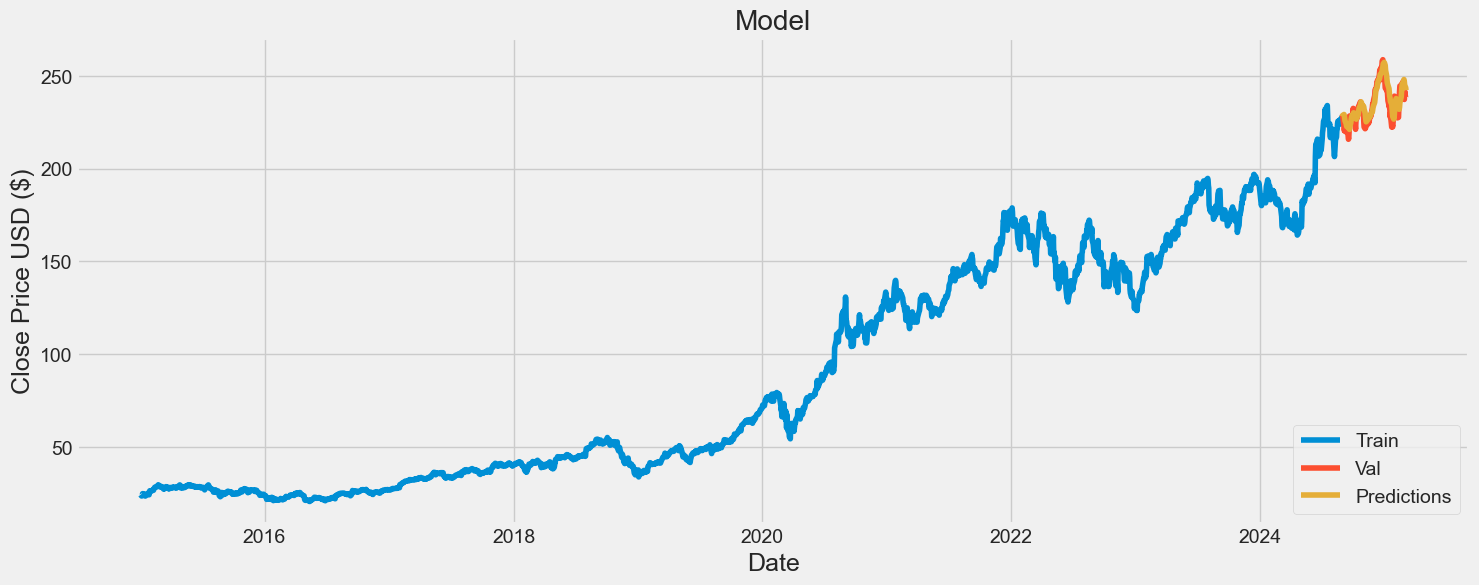

In [24]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-08-29,229.285370,228.141144
2024-08-30,228.497101,228.683945
2024-09-03,222.280792,229.202469
2024-09-04,220.365005,228.489365
2024-09-05,221.891647,227.015884
...,...,...
2025-02-26,240.360001,248.057266
2025-02-27,237.300003,247.060318
2025-02-28,241.839996,245.025452
